In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('kmeans_customer_data.csv')
dataset

,Customer,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,53,39,24
1,2,Female,54,49,64
2,3,Male,29,39,99
3,4,Male,39,43,49
4,5,Male,42,32,99
...,...,...,...,...,...
195,196,Female,30,39,56
196,197,Female,42,35,30
197,198,Female,52,50,5
198,199,Male,25,24,33


In [2]:
X=dataset.iloc[:, [3,4]].values

In [3]:
X

array([[ 39,  24],
       [ 49,  64],
       [ 39,  99],
       [ 43,  49],
       [ 32,  99],
       [ 32,  36],
       [ 16,  82],
       [ 49,  96],
       [ 30,  24],
       [ 50,  23],
       [ 47,  62],
       [ 18,  96],
       [ 47,  37],
       [ 28,  12],
       [ 35,  55],
       [ 34,  13],
       [ 22,  23],
       [ 21,  89],
       [ 17,  99],
       [ 31,  30],
       [ 47,  17],
       [ 26,  62],
       [ 36,  84],
       [ 36,  89],
       [ 44,  86],
       [ 22,  13],
       [ 41,  59],
       [ 41,  19],
       [ 48,  49],
       [ 35, 100],
       [ 44,  12],
       [ 47,  61],
       [ 42,  19],
       [ 47,  76],
       [ 19,   9],
       [ 33,  71],
       [ 18,  28],
       [ 49,  78],
       [ 31,  95],
       [ 42,  52],
       [ 44,  83],
       [ 43,  16],
       [ 20,  69],
       [ 49,  99],
       [ 38,  12],
       [ 43,  25],
       [ 45,  52],
       [ 49,  85],
       [ 47, 100],
       [ 35,  53],
       [ 46,  23],
       [ 37,  16],
       [ 47,

## Elbow Method

**This is used to initialize how many clusters are needed for our classification**

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []

In [12]:
for i in range (2,11):   # Minimum Cluster value should be one
    kmeans = KMeans(n_clusters=i ,random_state=42) # For each value of i that many clusters will be formed
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [13]:
wcss

[64081.00560897436,
 40021.0105347579,
 29918.88154389423,
 22018.894608680792,
 19032.88594440753,
 16228.689874303516,
 14217.336077211077,
 12747.186989889575,
 10783.72123963955]

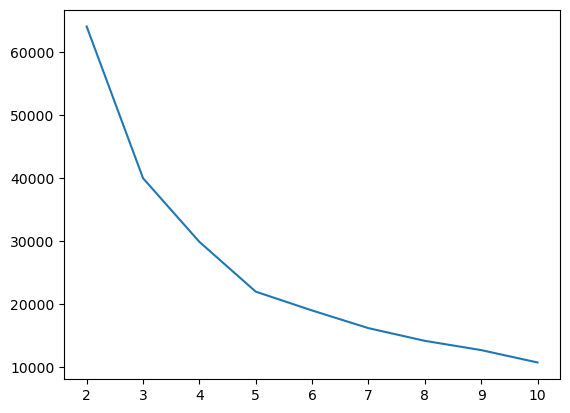

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),wcss)

**Here we can see it is forming like an acr like structure with a break point at 5 after five the slope is slant which shos it will give similar results thus , 5 will be the appropriate k value for the clusering**

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [22]:
y_means = kmeans.fit_predict(X)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
y_means

array([2, 3, 1, 3, 1, 0, 4, 1, 0, 2, 3, 4, 3, 2, 3, 2, 0, 4, 4, 0, 2, 4,
       1, 1, 1, 2, 3, 2, 3, 1, 2, 3, 2, 1, 2, 4, 0, 1, 1, 3, 1, 2, 4, 1,
       2, 2, 3, 1, 1, 3, 2, 2, 3, 0, 3, 3, 3, 0, 2, 1, 2, 0, 4, 1, 4, 2,
       4, 2, 4, 3, 2, 2, 3, 2, 0, 0, 2, 3, 0, 4, 2, 0, 0, 0, 4, 2, 3, 4,
       2, 4, 1, 3, 2, 0, 4, 0, 2, 4, 0, 0, 4, 1, 1, 2, 0, 4, 3, 2, 1, 3,
       2, 1, 3, 3, 0, 2, 2, 4, 1, 3, 3, 0, 3, 0, 0, 2, 4, 0, 3, 0, 3, 3,
       0, 2, 4, 1, 4, 0, 1, 2, 2, 3, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 1, 3,
       4, 2, 4, 1, 2, 4, 4, 2, 2, 2, 1, 0, 1, 2, 3, 3, 0, 0, 4, 3, 1, 3,
       0, 4, 2, 4, 2, 1, 4, 1, 0, 2, 3, 0, 2, 1, 4, 0, 0, 3, 2, 3, 0, 2,
       0, 4])

**So here the values are the cluters in which each data set is categorized from 0-4(5 clusters) for all the 200 datas** 

### Now Visualizing this :-

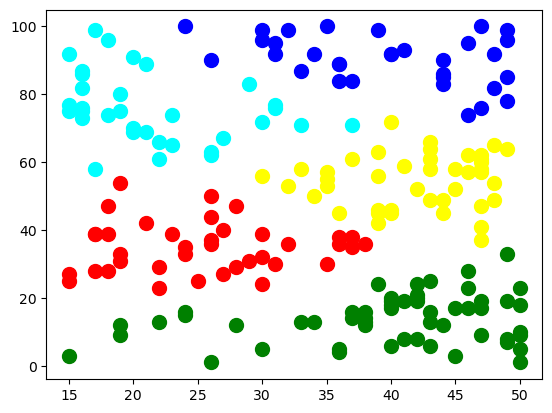

In [25]:
plt.scatter(X[y_means ==0,0], X[y_means ==0,1], s=100, c='red', label='Cluster-1')
plt.scatter(X[y_means ==1,0], X[y_means ==1,1], s=100, c='blue', label='Cluster-2')
plt.scatter(X[y_means ==2,0], X[y_means ==2,1], s=100, c='green', label='Cluster-3')
plt.scatter(X[y_means ==3,0], X[y_means ==3,1], s=100, c='yellow', label='Cluster-4')
plt.scatter(X[y_means ==4,0], X[y_means ==4,1], s=100, c='cyan', label='Cluster-5')